In [1345]:
import pandas as pd
import random
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import numpy as np

In [1346]:
data = pd.read_csv("Clinical-Metadata-FDG-PET_CT.csv")
data.drop_duplicates(inplace=True)
data.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex
0,1.3.6.1.4.1.14519.5.2.1.4219.6651.201203836389...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.75 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:16.75,MELANOMA,063Y,F
1,1.3.6.1.4.1.14519.5.2.1.4219.6651.685145825998...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,326,105.82 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:44.865,MELANOMA,063Y,F
2,1.3.6.1.4.1.14519.5.2.1.4219.6651.151532511484...,FDG-PET-CT-Lesions,NO,NaN,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,305,99.01 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:45.761,MELANOMA,061Y,M
3,1.3.6.1.4.1.14519.5.2.1.4219.6651.313152023416...,FDG-PET-CT-Lesions,NO,NaN,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.31 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:47.839,MELANOMA,061Y,M
4,1.3.6.1.4.1.14519.5.2.1.4219.6651.331726561677...,FDG-PET-CT-Lesions,NO,NaN,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.52 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:53.415,MELANOMA,063Y,F


In [1347]:
data.describe()

,Data Description URI,Number of Images
count,0.0,3042.000000
mean,NaN,301.432281
std,NaN,297.575955
min,NaN,1.000000
25%,NaN,1.000000
50%,NaN,326.000000
75%,NaN,391.000000
max,NaN,2651.000000


In [1348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3042 entries, 0 to 3041
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Series UID            3042 non-null   object 
 1   Collection            3042 non-null   object 
 2   3rd Party Analysis    3042 non-null   object 
 3   Data Description URI  0 non-null      float64
 4   Subject ID            3042 non-null   object 
 5   Study UID             3042 non-null   object 
 6   Study Description     3042 non-null   object 
 7   Study Date            3042 non-null   object 
 8   Series Description    3042 non-null   object 
 9   Manufacturer          3042 non-null   object 
 10  Modality              3042 non-null   object 
 11  SOP Class Name        3042 non-null   object 
 12  SOP Class UID         3042 non-null   object 
 13  Number of Images      3042 non-null   int64  
 14  File Size             3042 non-null   object 
 15  File Location        

In [1349]:

data.drop(columns='Data Description URI', inplace=True)

In [1350]:
data['age']=data['age'].fillna(data['age'].mode())

In [1351]:

data['age']=data['age'].map(lambda x:int(x[0:3]))

In [1352]:
data['sex']=data['sex'].fillna(str(data['sex'].mode()))

In [1353]:
data['diagnosis'].unique()

array(['MELANOMA', 'LUNG_CANCER', 'NEGATIVE', 'LYMPHOMA'], dtype=object)

In [1354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3042 entries, 0 to 3041
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Series UID          3042 non-null   object
 1   Collection          3042 non-null   object
 2   3rd Party Analysis  3042 non-null   object
 3   Subject ID          3042 non-null   object
 4   Study UID           3042 non-null   object
 5   Study Description   3042 non-null   object
 6   Study Date          3042 non-null   object
 7   Series Description  3042 non-null   object
 8   Manufacturer        3042 non-null   object
 9   Modality            3042 non-null   object
 10  SOP Class Name      3042 non-null   object
 11  SOP Class UID       3042 non-null   object
 12  Number of Images    3042 non-null   int64 
 13  File Size           3042 non-null   object
 14  File Location       3042 non-null   object
 15  Download Timestamp  3042 non-null   object
 16  diagnosis           3042

In [1355]:
data.to_csv("Cleaned_Clinical-Metadata-FDG-PET_CT.csv", index=False)

In [1356]:
def status_of_patient(row):
    if row["diagnosis"] in ['NEGATIVE', 'LYMPHOMA']:
        return "NOT_SICK"
    else:
        return "SICK"

In [1357]:
data['Patient status']=data.apply(status_of_patient, axis=1)
data.head()

,Series UID,Collection,3rd Party Analysis,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex,Patient status
0,1.3.6.1.4.1.14519.5.2.1.4219.6651.201203836389...,FDG-PET-CT-Lesions,NO,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.75 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:16.75,MELANOMA,63,F,SICK
1,1.3.6.1.4.1.14519.5.2.1.4219.6651.685145825998...,FDG-PET-CT-Lesions,NO,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,326,105.82 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:44.865,MELANOMA,63,F,SICK
2,1.3.6.1.4.1.14519.5.2.1.4219.6651.151532511484...,FDG-PET-CT-Lesions,NO,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,305,99.01 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:45.761,MELANOMA,61,M,SICK
3,1.3.6.1.4.1.14519.5.2.1.4219.6651.313152023416...,FDG-PET-CT-Lesions,NO,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.31 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:47.839,MELANOMA,61,M,SICK
4,1.3.6.1.4.1.14519.5.2.1.4219.6651.331726561677...,FDG-PET-CT-Lesions,NO,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.52 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:53.415,MELANOMA,63,F,SICK


<Axes: >

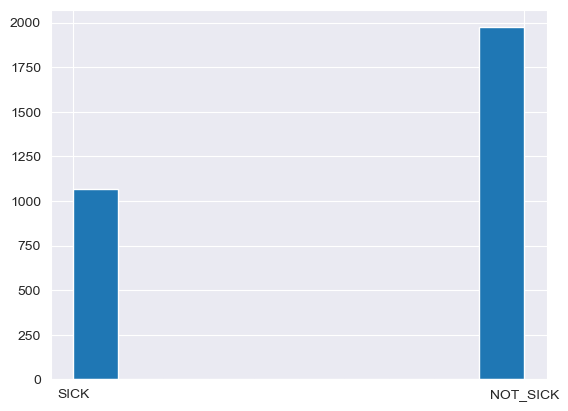

In [1358]:
data["Patient status"].hist()

In [1359]:
marked_by_rules_data=data

In [1360]:
data = pd.read_csv("Cleaned_Clinical-Metadata-FDG-PET_CT.csv", engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
data.head()

,Series UID,Collection,3rd Party Analysis,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex
0,1.3.6.1.4.1.14519.5.2.1.4219.6651.201203836389...,FDG-PET-CT-Lesions,NO,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.75 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:16.75,MELANOMA,63,F
1,1.3.6.1.4.1.14519.5.2.1.4219.6651.685145825998...,FDG-PET-CT-Lesions,NO,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,326,105.82 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:44.865,MELANOMA,63,F
2,1.3.6.1.4.1.14519.5.2.1.4219.6651.151532511484...,FDG-PET-CT-Lesions,NO,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,305,99.01 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:45.761,MELANOMA,61,M
3,1.3.6.1.4.1.14519.5.2.1.4219.6651.313152023416...,FDG-PET-CT-Lesions,NO,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.31 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:47.839,MELANOMA,61,M
4,1.3.6.1.4.1.14519.5.2.1.4219.6651.331726561677...,FDG-PET-CT-Lesions,NO,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.52 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:53.415,MELANOMA,63,F


In [1361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3042 entries, 0 to 3041
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Series UID          3042 non-null   object
 1   Collection          3042 non-null   object
 2   3rd Party Analysis  3042 non-null   object
 3   Subject ID          3042 non-null   object
 4   Study UID           3042 non-null   object
 5   Study Description   3042 non-null   object
 6   Study Date          3042 non-null   object
 7   Series Description  3042 non-null   object
 8   Manufacturer        3042 non-null   object
 9   Modality            3042 non-null   object
 10  SOP Class Name      3042 non-null   object
 11  SOP Class UID       3042 non-null   object
 12  Number of Images    3042 non-null   int64 
 13  File Size           3042 non-null   object
 14  File Location       3042 non-null   object
 15  Download Timestamp  3042 non-null   object
 16  diagnosis           3042

In [1362]:
data.describe()

,Number of Images,age
count,3042.000000,3042.000000
mean,301.432281,59.403353
std,297.575955,15.990050
min,1.000000,11.000000
25%,1.000000,50.000000
50%,326.000000,61.000000
75%,391.000000,72.000000
max,2651.000000,95.000000


In [1363]:
subset = data.sample(frac=0.01)
subset.head()

,Series UID,Collection,3rd Party Analysis,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex
1297,1.3.6.1.4.1.14519.5.2.1.4219.6651.180673432026...,FDG-PET-CT-Lesions,NO,PETCT_71ac560ffe,1.3.6.1.4.1.14519.5.2.1.4219.6651.195408258191...,PET-CT Ganzkoerper primaer mit KM,3/19/2007,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,11.38 MB,./FDG-PET-CT-Lesions/PETCT_71ac560ffe/03-19-20...,2022-03-17T16:18:02.005,NEGATIVE,74,F
2544,1.3.6.1.4.1.14519.5.2.1.4219.6651.532200601108...,FDG-PET-CT-Lesions,NO,PETCT_d626611daf,1.3.6.1.4.1.14519.5.2.1.4219.6651.127493242739...,PET-CT Ganzkoerper primaer mit KM,11/29/2002,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,13.68 MB,./FDG-PET-CT-Lesions/PETCT_d626611daf/11-29-20...,2022-03-17T20:17:08.414,MELANOMA,79,M
1100,1.3.6.1.4.1.14519.5.2.1.4219.6651.211445457463...,FDG-PET-CT-Lesions,NO,PETCT_6016a6c3af,1.3.6.1.4.1.14519.5.2.1.4219.6651.943568303614...,PET-CT Ganzkoerper primaer mit KM,7/1/2002,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,326,105.82 MB,./FDG-PET-CT-Lesions/PETCT_6016a6c3af/07-01-20...,2022-03-17T15:44:37.707,NEGATIVE,81,F
196,1.3.6.1.4.1.14519.5.2.1.4219.6651.283248167484...,FDG-PET-CT-Lesions,NO,PETCT_14f931f634,1.3.6.1.4.1.14519.5.2.1.4219.6651.274553449696...,PET-CT Ganzkoerper primaer mit KM,6/9/2005,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,588,190.88 MB,./FDG-PET-CT-Lesions/PETCT_14f931f634/06-09-20...,2022-03-17T13:25:55.537,MELANOMA,56,F
1921,1.3.6.1.4.1.14519.5.2.1.4219.6651.229250374881...,FDG-PET-CT-Lesions,NO,PETCT_a4cd2b10de,1.3.6.1.4.1.14519.5.2.1.4219.6651.319460281001...,PET-CT Ganzkoerper primaer mit KM,10/15/2005,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,318,103.23 MB,./FDG-PET-CT-Lesions/PETCT_a4cd2b10de/10-15-20...,2022-03-17T18:11:43.994,NEGATIVE,74,M


In [1364]:
# Данные которые будут размечать Label_Studio
subset.to_csv("Subset_Clinical-Metadata-FDG-PET_CT.csv", index=False)

In [1365]:
# Данные размеченные в Label_Studio 
manual_data = pd.read_csv("Manual_labeled_Subset_Clinical-Metadata-FDG-PET_CT.csv")

In [1366]:
manual_data.head()

,3rd Party Analysis,Collection,Download Timestamp,File Location,File Size,Manufacturer,Modality,Number of Images,SOP Class Name,SOP Class UID,...,age,annotation_id,annotator,created_at,diagnosis,id,lead_time,sentiment,sex,updated_at
0,NO,FDG-PET-CT-Lesions,2022-03-17T16:40:53.654,./FDG-PET-CT-Lesions/PETCT_7cfd708a53/06-17-20...,186.99 MB,SIEMENS,PT,576,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,...,55,6,1,2024-12-05T20:37:39.060551Z,MELANOMA,1,3.553,SICK,M,2024-12-05T20:37:39.060551Z
1,NO,FDG-PET-CT-Lesions,2022-03-17T17:47:33.551,./FDG-PET-CT-Lesions/PETCT_9b9d67b3ff/07-12-20...,179.60 MB,SIEMENS,CT,340,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,...,62,7,1,2024-12-05T20:39:54.351849Z,NEGATIVE,2,8.255,NOT_SICK,M,2024-12-05T20:39:54.351849Z
2,NO,FDG-PET-CT-Lesions,2022-03-17T18:04:51.822,./FDG-PET-CT-Lesions/PETCT_a2a68bbe97/08-21-20...,206.55 MB,SIEMENS,CT,391,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,...,48,8,1,2024-12-05T20:40:19.250762Z,MELANOMA,3,2.842,SICK,M,2024-12-05T20:40:19.250762Z
3,NO,FDG-PET-CT-Lesions,2022-03-17T14:30:23.645,./FDG-PET-CT-Lesions/PETCT_39eca178a1/06-08-20...,132.76 MB,SIEMENS,PT,409,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,...,18,9,1,2024-12-05T20:40:34.714650Z,NEGATIVE,4,5.980,NOT_SICK,"0 M\r\nName: sex, dtype: object",2024-12-05T20:40:34.714650Z
4,NO,FDG-PET-CT-Lesions,2022-03-17T20:36:18.524,./FDG-PET-CT-Lesions/PETCT_dc15c1d9bb/06-03-20...,190.15 MB,SIEMENS,CT,360,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,...,49,10,1,2024-12-05T20:40:53.865133Z,NEGATIVE,5,2.660,NOT_SICK,M,2024-12-05T20:40:53.865133Z


In [1367]:
manual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   3rd Party Analysis  30 non-null     object 
 1   Collection          30 non-null     object 
 2   Download Timestamp  30 non-null     object 
 3   File Location       30 non-null     object 
 4   File Size           30 non-null     object 
 5   Manufacturer        30 non-null     object 
 6   Modality            30 non-null     object 
 7   Number of Images    30 non-null     int64  
 8   SOP Class Name      30 non-null     object 
 9   SOP Class UID       30 non-null     object 
 10  Series Description  30 non-null     object 
 11  Series UID          30 non-null     object 
 12  Study Date          30 non-null     object 
 13  Study Description   30 non-null     object 
 14  Study UID           30 non-null     object 
 15  Subject ID          30 non-null     object 
 16  age       

In [1368]:
deleted_columns = list(set(subset.columns.tolist()).symmetric_difference(set(manual_data.columns.tolist())))
manual_data['Patient status']=manual_data['sentiment']
manual_data.drop(columns=deleted_columns, inplace=True)
manual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   3rd Party Analysis  30 non-null     object
 1   Collection          30 non-null     object
 2   Download Timestamp  30 non-null     object
 3   File Location       30 non-null     object
 4   File Size           30 non-null     object
 5   Manufacturer        30 non-null     object
 6   Modality            30 non-null     object
 7   Number of Images    30 non-null     int64 
 8   SOP Class Name      30 non-null     object
 9   SOP Class UID       30 non-null     object
 10  Series Description  30 non-null     object
 11  Series UID          30 non-null     object
 12  Study Date          30 non-null     object
 13  Study Description   30 non-null     object
 14  Study UID           30 non-null     object
 15  Subject ID          30 non-null     object
 16  age                 30 non-n

In [1369]:
# Добавим к диагнозу слова из случайных слов. Вставляем ключевое слово диагноза в случайное место в предложении
def add_random_words(initial_word):
    length=random.randint(1, 10)
    count_words=random.randint(5, 20)
    random_words = [' '.join(random.choices(string.ascii_lowercase, k=length)) for _ in range(count_words)]
    senten=initial_word.join(random_words)
    words=senten.split()
    random.shuffle(words)
    return ' '.join(words)

manual_data['diagnosis']=manual_data['diagnosis'].apply(add_random_words)
marked_by_rules_data['diagnosis']=marked_by_rules_data['diagnosis'].apply(add_random_words)

In [1370]:
manual_data_initial=manual_data

In [1371]:
common_data=pd.concat([marked_by_rules_data, manual_data], ignore_index=True)
common_data.head()

,Series UID,Collection,3rd Party Analysis,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp,diagnosis,age,sex,Patient status
0,1.3.6.1.4.1.14519.5.2.1.4219.6651.201203836389...,FDG-PET-CT-Lesions,NO,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.75 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:16.75,y a o f k l o k k q r t b v m uMELANOMAj t h j...,63,F,SICK
1,1.3.6.1.4.1.14519.5.2.1.4219.6651.685145825998...,FDG-PET-CT-Lesions,NO,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,326,105.82 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:44.865,vMELANOMAr yMELANOMAf j hMELANOMAe v s hMELANO...,63,F,SICK
2,1.3.6.1.4.1.14519.5.2.1.4219.6651.151532511484...,FDG-PET-CT-Lesions,NO,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,PET corr.,SIEMENS,PT,Positron Emission Tomography Image Storage,1.2.840.10008.5.1.4.1.1.128,305,99.01 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:45.761,c j lMELANOMAs r t f c o y j s q m f s k jMELA...,61,M,SICK
3,1.3.6.1.4.1.14519.5.2.1.4219.6651.313152023416...,FDG-PET-CT-Lesions,NO,PETCT_01140d52d8,1.3.6.1.4.1.14519.5.2.1.4219.6651.316964892168...,PET-CT Ganzkoerper primaer mit KM,8/13/2005,Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,6.31 MB,./FDG-PET-CT-Lesions/PETCT_01140d52d8/08-13-20...,2022-03-17T12:53:47.839,m f n z u s r x p l y g b j y q m j s jMELANOM...,61,M,SICK
4,1.3.6.1.4.1.14519.5.2.1.4219.6651.331726561677...,FDG-PET-CT-Lesions,NO,PETCT_0011f3deaf,1.3.6.1.4.1.14519.5.2.1.4219.6651.389860614478...,PET-CT Ganzkoerper primaer mit KM,3/23/2003,GK p.v.3,SIEMENS,CT,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,391,206.52 MB,./FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-20...,2022-03-17T12:53:53.415,u m o l w e dMELANOMAr b m m u i bMELANOMAf zM...,63,F,SICK


In [1372]:
common_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Series UID          3072 non-null   object
 1   Collection          3072 non-null   object
 2   3rd Party Analysis  3072 non-null   object
 3   Subject ID          3072 non-null   object
 4   Study UID           3072 non-null   object
 5   Study Description   3072 non-null   object
 6   Study Date          3072 non-null   object
 7   Series Description  3072 non-null   object
 8   Manufacturer        3072 non-null   object
 9   Modality            3072 non-null   object
 10  SOP Class Name      3072 non-null   object
 11  SOP Class UID       3072 non-null   object
 12  Number of Images    3072 non-null   int64 
 13  File Size           3072 non-null   object
 14  File Location       3072 non-null   object
 15  Download Timestamp  3072 non-null   object
 16  diagnosis           3072

In [1373]:
common_data['Patient status'] = common_data['Patient status'].replace({'NOT_SICK': 0, 'SICK': 1}).astype(int)

C:\Users\dvora\AppData\Local\Temp\ipykernel_4012\2860547421.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  common_data['Patient status'] = common_data['Patient status'].replace({'NOT_SICK': 0, 'SICK': 1}).astype(int)


In [1374]:
common_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Series UID          3072 non-null   object
 1   Collection          3072 non-null   object
 2   3rd Party Analysis  3072 non-null   object
 3   Subject ID          3072 non-null   object
 4   Study UID           3072 non-null   object
 5   Study Description   3072 non-null   object
 6   Study Date          3072 non-null   object
 7   Series Description  3072 non-null   object
 8   Manufacturer        3072 non-null   object
 9   Modality            3072 non-null   object
 10  SOP Class Name      3072 non-null   object
 11  SOP Class UID       3072 non-null   object
 12  Number of Images    3072 non-null   int64 
 13  File Size           3072 non-null   object
 14  File Location       3072 non-null   object
 15  Download Timestamp  3072 non-null   object
 16  diagnosis           3072

<Axes: >

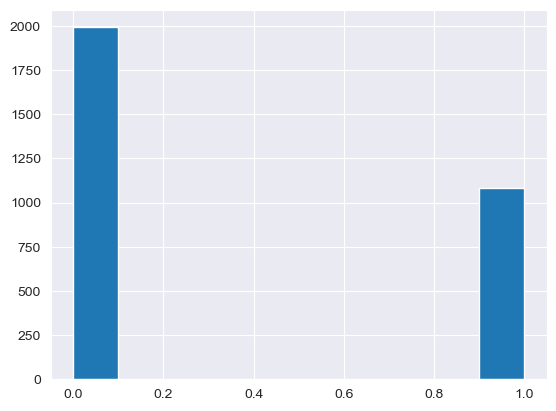

In [1375]:
common_data['Patient status'].hist()

In [1376]:
common_data=shuffle(common_data)

In [1377]:
# Разделение датасета на размеченную и неразмеченную выборки
manual_data, unlabeled_data = train_test_split(common_data, train_size=0.2, random_state=42)

In [1378]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(manual_labeled):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(manual_labeled['diagnosis'])
    y = manual_labeled['Patient status']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [1379]:
# Обучение начальной модели на небольшом наборе 
model, vectorizer = train_model(manual_data)

In [1380]:
# Использование исходной модели для прогнозирования статуса пациента в неразмеченных данных
X_unlabeled = vectorizer.transform(unlabeled_data['diagnosis'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [1381]:
# Вычислить неопределенности или энтропии предсказаний

y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [1382]:
# Выбор 100 наиболее неопределенных точек данных для маркировки человеком
labeled_data_new = unlabeled_data.iloc[uncertainty.argsort()[:100]]
unlabeled_data_new = unlabeled_data.iloc[uncertainty.argsort()[100:]]

In [1383]:
# Разметка новых точек данных и добавление их к размеченному множеству
manual_data = pd.concat([manual_data, labeled_data_new])

In [1384]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(manual_data)

In [1385]:
data_test = manual_data_initial

In [1386]:
data_test['Patient status'] = data_test['Patient status'].replace({'NOT_SICK': 0, 'SICK': 1})

C:\Users\dvora\AppData\Local\Temp\ipykernel_4012\514227014.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test['Patient status'] = data_test['Patient status'].replace({'NOT_SICK': 0, 'SICK': 1})


In [1387]:
# Оценка модели на тестовом датасете
X_test = vectorizer.transform(data_test['diagnosis'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(data_test['Patient status'], y_test_predicted)
print(f1)

0.8571428571428571


In [ ]:
# Модель достигает хорошей точности даже при разнообразии написанных диагнозов.